이산형 확률분포

  - 확률변수 : 변수가 취할 수 있는 값과 그 값이 나오는 확률
  - 확률분포 : 확률변수가 취할 수 있는 값, 그 확률의 구체적인 대응
  - x_set : 확률변수가 취할 수 있는 값의 집합
  - 확률함수 : 확률변수X가 x가 될때의 확률을 반환하는 함수
  - 기댓값 : 확률변수의 평균
  - 결합분포(결합확률분포) : 두개의 확률변수를 동시에 고려한 분포
 

In [199]:
# 1차원 이산확률분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
X = [x_set, f]

In [200]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set, prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

<function matplotlib.pyplot.show(close=None, block=None)>

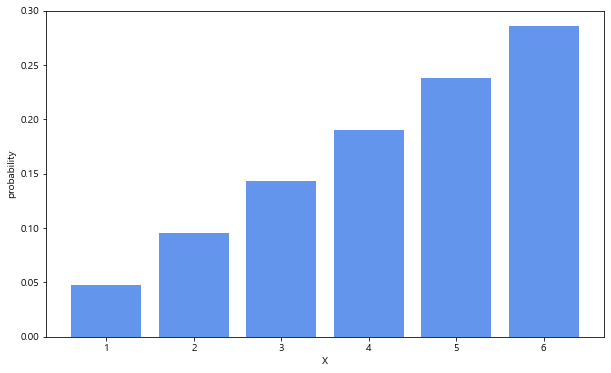

In [201]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob, color='cornflowerblue')
ax.set_xlabel('X')
ax.set_ylabel('probability')
plt.show

Text(0.5, 1.0, 'Bar Graph')

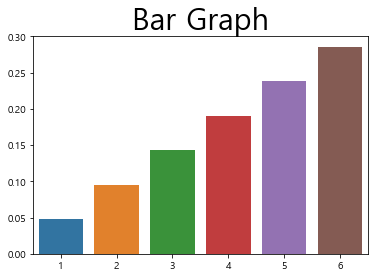

In [202]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)

In [203]:
np.all(prob>=0)

True

In [204]:
np.sum(prob)

0.9999999999999999

In [205]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [206]:
F(6)

0.9999999999999999

In [207]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [208]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며, 기댓값이라고 부른다.
np.sum([x_k*f(x_k) for x_k in x_set])

4.333333333333333

In [209]:
# 확률변수의 기댓값은 확률변수를 무제한 수행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332539

In [210]:
# 일반화표현
def E(X, g=lambda x:x):
    x_set, f=X   # f= X 오른쪽에서 왼쪽으로 대입(확률변수=확률)  => f(x_k)는 i를 의미한다고 생각하면 됨.
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [211]:
E(X)

4.333333333333333

In [212]:
#변환을 할 경우의 기댓값
E(X, g=lambda x:2*x+3)

11.666666666666664

In [213]:
#기댓값의 선형성(선형성이란 비슷한 성질을 가진다는 의미이다.)
2 * E(X) + 3

11.666666666666666

In [214]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])  #for문을 보다 간편하게 표현

2.2222222222222223

In [215]:
# 일반화
def V(X, g=lambda x:x):
    x_set, f=X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

In [216]:
V(X)

2.2222222222222223

In [217]:
V(X, lambda x : 2*x + 3)

8.88888888888889

In [218]:
# 분산의 공식
2**2*V(X)

8.88888888888889

In [219]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [220]:
def f_XY(x,y):
    if 1<= y <= 6 and 1<= x-y <=6:
        return y * (x-y) / 441   # y: A(y의 눈금) , B(x-y의 값) =>p129~130참조 
    else:
        return 0

In [221]:
XY= [x_set,y_set,f_XY]

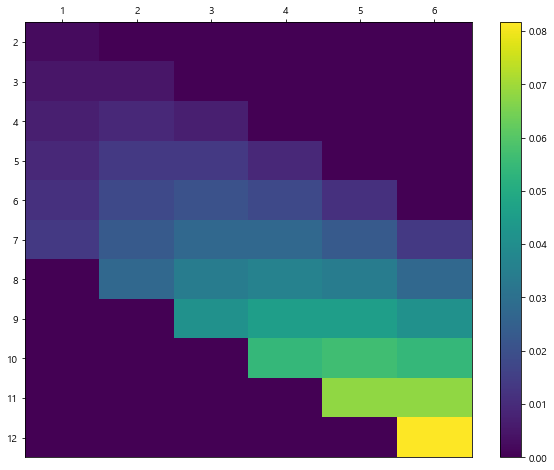

In [222]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax =fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
#y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다.
ax.invert_yaxis()
#x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()


In [223]:
np.all(prob >=0)

True

In [224]:
np.sum(prob)

1.0

In [225]:
# 주변 확률 분포: 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 알고 싶은 상황

In [226]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [227]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [228]:
X = [x_set,f_X]
Y = [y_set,f_Y]

In [229]:
X

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [230]:
Y

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

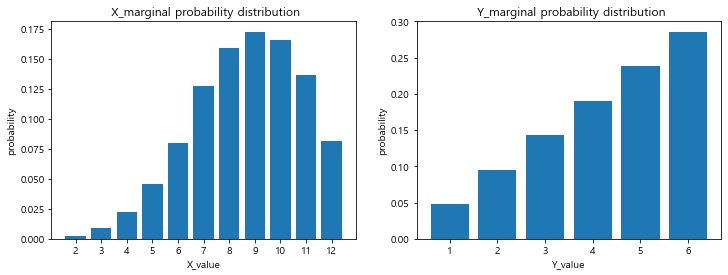

In [231]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title(' X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title(' Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [232]:
# 2차원 이산형 확률분포의 지표
# 기댓값(확률변수의 평균)
np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [233]:
# 다중 for 문
sum = 0
for y_j in y_set:
    for x_i in x_set:
       sum += x_i * f_XY(x_i,y_j) 
sum
    
    

8.666666666666666

In [234]:
def E(XY, g): 
    x_set, y_set,f_XY =XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [235]:
mean_X = E(XY, lambda x,y:x)
mean_X

8.666666666666666

In [236]:
mean_Y = E(XY, lambda x,y:y)
mean_Y

4.333333333333333

In [237]:
a,b = 2,3

In [238]:
#기댓값의 선형성
E(XY, lambda x,y: a*x + b*y)

30.333333333333332

In [239]:
# 분산: X의 분산이라면 X에 관한 편차의 제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i-mean_X)**2*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [240]:
# 분산의 사용자함수
def V(XY, g):
    x_set,y_set, f_XY =XY
    mean=E(XY, g)
    return np.sum([(g(x_i,y_j)-mean)**2*f_XY(x_i,y_j)
                 for x_i in x_set for y_j in y_set])

In [241]:
var_X = V(XY, lambda x,y:x)
var_X

4.444444444444444

In [242]:
var_Y = V(XY, lambda x,y:y)
var_Y

2.2222222222222223

In [243]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_Y = E(XY, lambda x,y:y)
    mean_X = E(XY, lambda x,y:x)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                   for x_i in x_set for y_j in y_set])

In [244]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [245]:
V(XY, lambda x,y:a*x + b*y)

64.44444444444444

In [246]:
#분산과 공분산의 공식
a**2 * var_X + b**2 * var_Y + 2*a*b*cov_xy

64.44444444444443

In [247]:
# 확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출

In [248]:
 cov_xy / np.sqrt(var_X*var_Y)

0.7071067811865474

 - 비모수적 기법 : 모집단의 확률분포에 어떠한 가정도 하지 않는것
 - 모수적 기법 : 모집단에 대한 어느정도의 가정을 전제하고, 그 뒤에 확률분포의 기댓값이나 분산을 결정하는 소수의 파라미터를 추측하는 방법
 - check_prob는 확률변수를 인수로 가지며, 그 확률변수가 확률의 성질을 만족하는지 확인하고, 기댓값과 분산을 계산하여 반환하는 함수.

대표적인 이산형 확률분포

In [249]:
# assert : 원하는 조건의 변수 값을 보증받을 때까지 테스트 
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X, g=lambda x: x):
    x_set, f =X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f=X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

def check_prob(X): #확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability'
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance{(V(X)):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X   # 대입연산자(=): 오른쪽에서 왼쪽으로 
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig =plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set,prob,label='prob')
    ax.vlines(E(X),0,1,label='mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

#### 베르누이 분포(다양한 경우에 응용됨)
 - 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
 - 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
 - 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률 

In [250]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [251]:
p = 0.3
X = Bern(p)

In [252]:
check_prob(X)

expected value 0.3
variance0.21


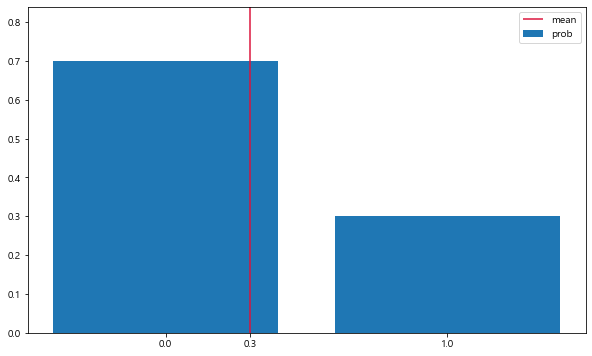

In [253]:
plot_prob(X)

In [254]:
rv = stats.bernoulli(p)

In [255]:
rv.pmf(0),rv.pmf(1)

(0.7, 0.3)

In [256]:
rv.pmf([0,1])    # pmf 메소드

array([0.7, 0.3])

In [257]:
rv.cdf([0,1])   #  cdf : 누적밀도함수

array([0.7, 1. ])

In [258]:
rv.mean(), rv.var()

(0.3, 0.21)

#### 이항분포
 - 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
 
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,...,n\}$)

       0            (otherwise)

In [259]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [260]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 이항분포의 기대값과 분산을 구하세요.

In [261]:
n =10
p = 0.3
X =Bin(n,p)

In [262]:
check_prob(X)

expected value 3.0
variance2.1


In [263]:
#[과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요

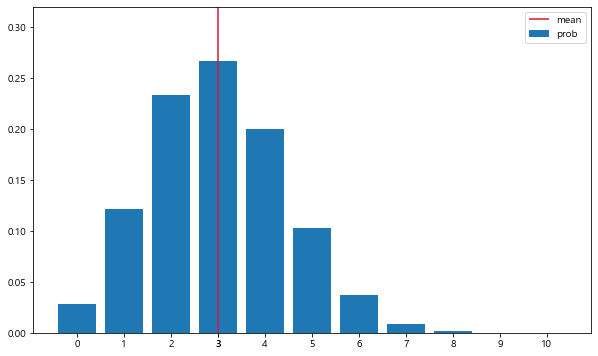

In [264]:
plot_prob(X)

In [265]:
#[과제] 확률이 0.3, 0.5, 0.7로 변할때 확률함수가 변하는 모습을 시각화 하세요

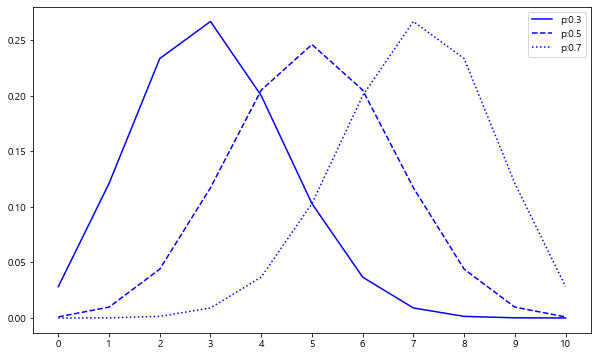

In [266]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}',ls=ls, color='blue')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 기하분포
 - 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
 - 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기
 
f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,...\})$

       0              (otherwise)
 - 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$

In [267]:
# [과제] 사용자 함수를 구하세요(단, 확률변수를 1 이상 29 이하인 정수로 설정)
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p) **(x-1)
        else:
            return 0
    return x_set, f

In [268]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요

In [269]:
p = 0.5
x = Ge(p)

In [270]:
check_prob(x)

expected value 2.0
variance2.0


In [271]:
#[과제] 상기 기하분포의 확률함수와 기댓값을 시각화 하세요

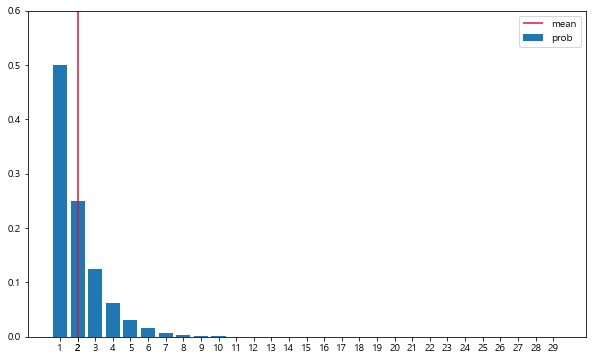

In [272]:
plot_prob(x)

In [273]:
#[과제] 성공 확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화하는 모습을 시각화 하세요.

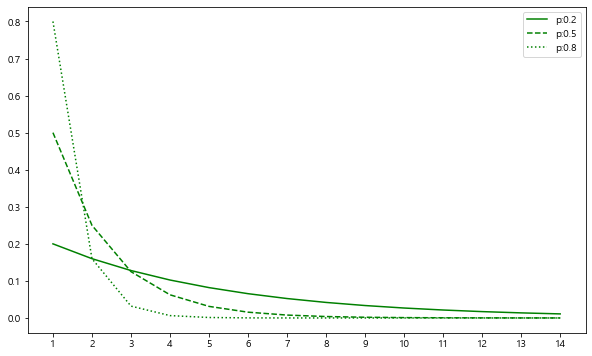

In [274]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip ([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set,rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='green')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 포아송 분포
 - 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는  $\lambda$로 나타낸다.
 - 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
 - 하루에 한번도 교통사고가 발생하지 않을 확률: P(X=0) =2!/0! * $e^{-2}$ = 0.135

 - 포아송 분포의 기댓값과 분산은 모두  $\lambda$가 된다.
 
f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$
       
         0              (otherwise)

In [275]:
# [과제] 사용자 함수를 구하세요(단, 확률변수를 1 이상 19 이하인 정수로 설정)
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [276]:
#[과제] 람다값이 3일때 포아송분포의 기댓값과 분산을 구하세요

In [277]:
lam = 3
x = Poi(lam)

In [278]:
check_prob(x)

expected value 3.0
variance3.0


In [279]:
#[과제] 상기 포아송분포의 확률함수와 기댓값을 시각화 하세요

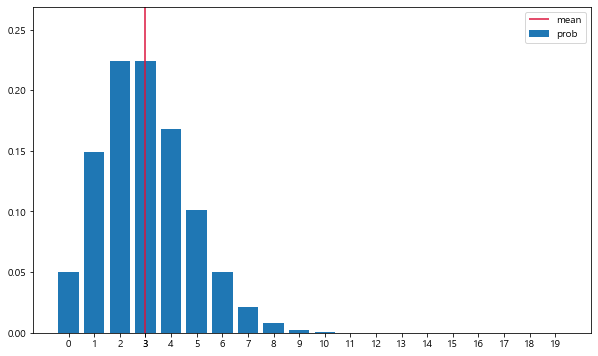

In [280]:
plot_prob(x)

In [281]:
#[과제] 람다가 3, 5, 8로 변할 때 확률함수가 변화하는 모습을 시각화 하세요.

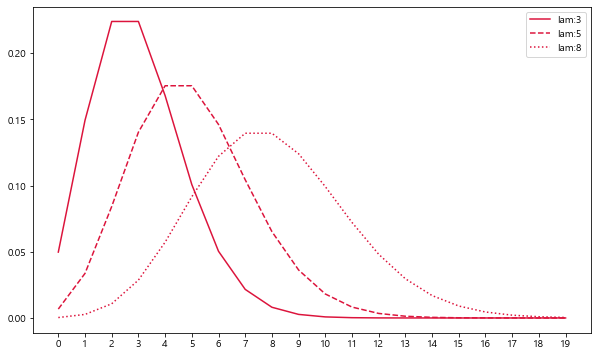

In [282]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8],linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set,rv.pmf(x_set),
           label=f'lam:{lam}',ls=ls, color='crimson' )
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

$f(x)=
\begin{cases}
_{n}\mathrm{C}_{x}p^x(1-p)^{(n-x)} & \mbox {$(x \in \{0,1,...,n\}$} \\
\\
0 & \mbox{(otherwise)}
\end{cases}$

#### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

$f(x)=
\begin{cases}
(1-p)^{(x-1)}p & \mbox {$(x \in \{1,2,3,...\}$} \\
\\
0 & \mbox{(otherwise)}
\end{cases}$
       
- 기하분포의 기댓값과 분산 : $E(X) = {1\over p}, \ V(X)={(1-p) \over p^2}$ 

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 $Poi(2)$를 따른다.
  예) 하루에 교통사고가 한 건도 일어나지 않을 확률 : $P(X=0)$= ${2! \over 0!}$ $\cdot$ $e^{-2}$ $\simeq$ 0.135


- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

$f(x) =
\begin{cases}
{\lambda^x \over x!} \cdot e^{-\lambda} & \mbox (x \in \{0,1,2,...\}) \\
\\
0 & \mbox{(otherwise)}
\end{cases}$


In [283]:
# [과제] 베르누이, 이항분포, 기하함수, 포아송분포의 사례를 각각 2개씩 제시및 설명하세요. 

# 베르누이
 - 사례1 : 적색공 8개와 흑색공 2개가 들어있는 주머니에서 공 하나를 뽑을때 적색공이면 실패, 흑색공이면 성공이라고 할때 흑색공이 나올 확률은
 - 사례2 : 온라인게임에서 10%의 확률로 아이템을 강화가 성공한다고 한다면, 아이템을 강화하는데 성공할 확률은?

In [284]:
# 사용자함수
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [285]:
#사례1
p = 0.2
X = Bern(p)

In [286]:
check_prob(X)

expected value 0.2
variance0.16


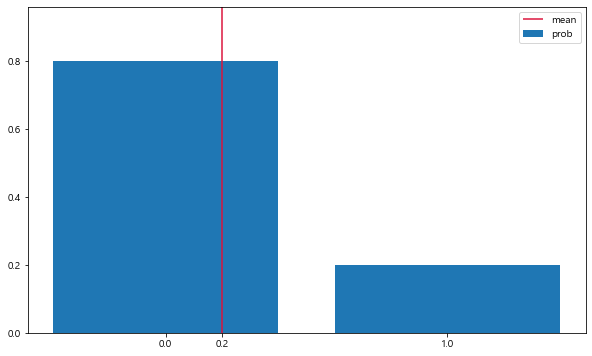

In [287]:
plot_prob(X)

In [288]:
#사례2
p = 0.1
X = Bern(p)

In [289]:
check_prob(X)

expected value 0.1
variance0.09


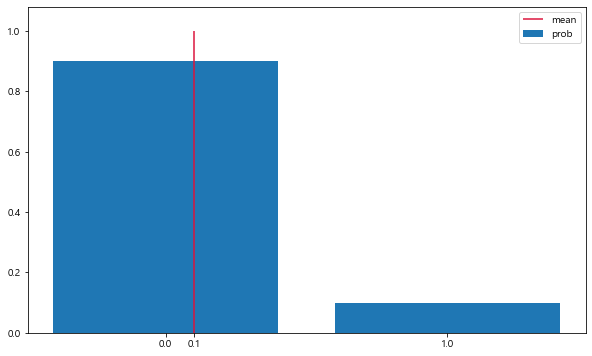

In [290]:
plot_prob(X)

# 이항분포
 - 사례1 축구선수가 패널티킥을 찼을때 이 선수가 10번의 패널티킥을 차서 성공할 확률은?
 - 사례2 치명적인 바이러스에 감염되었을대, 회복률이 10%라고 한다. 그럼 바이러스에 감염된 환자 20명을 치료했을때 회복될 확률은?

In [291]:
#사용자 함수
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [292]:
#사례1
n =10
p = 0.5
X =Bin(n,p)

In [293]:
check_prob(X)

expected value 5.0
variance2.5


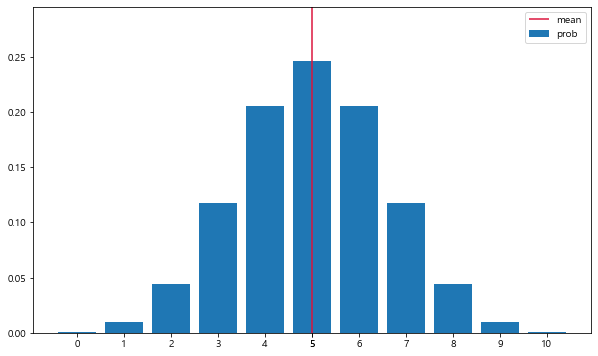

In [294]:
plot_prob(X)

In [295]:
#사례2

In [296]:
n =20
p = 0.1
X =Bin(n,p)

In [297]:
check_prob(X)

expected value 2.0
variance1.8


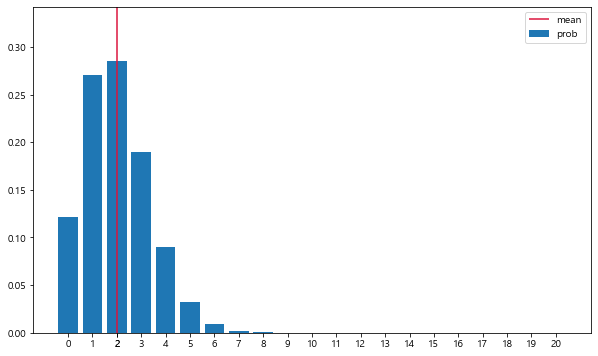

In [298]:
plot_prob(X)

## 기하함수
 - 사례1 어느 야구 선수가 안타을 칠 확률이 40%라고 하자, 그럼 이선수가 8번째 타석에서 안타를 칠 확률은?
 - 사례2 어떤 사람의 운전면허 합격률은 80%라고 한다. 그러면 이 지원자가 적어도 5번 이내에 합격할 확률은?

In [299]:
#사용자 함수
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p) **(x-1)
        else:
            return 0
    return x_set, f

In [300]:
#사례1
p = 0.4
x = Ge(p)

In [301]:
check_prob(x)

expected value 2.5
variance3.75


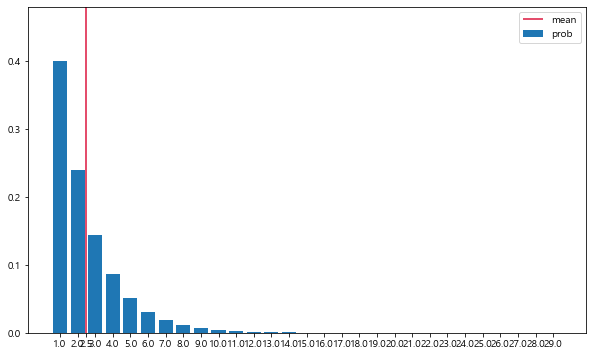

In [302]:
plot_prob(x)

In [303]:
#사례2
p = 0.8
x = Ge(p)

In [304]:
check_prob(x)

expected value 1.25
variance0.3125


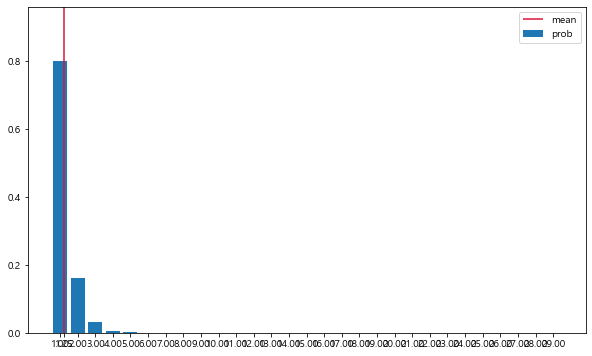

In [305]:
plot_prob(x)

## 포아송분포

사례1  고객센터의 상담건수가 1시간에 180건의 전화요청이 들어온다고 한다 그럼 1분동안 걸려오는 전화가 10건 이하일 확률은?

사례2 어느 출판사에서 책의 오탈자를 검사하였다. 10 페이지중에서 오타가 20개 발견되었다. 이 책에서 무작위로 한 페이지를 검사할때 오타가 3개 나올 확률은?   

In [306]:
# 사용자함수
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [307]:
# 사례1
lam = 3
x = Poi(lam)

In [308]:
check_prob(x)

expected value 3.0
variance3.0


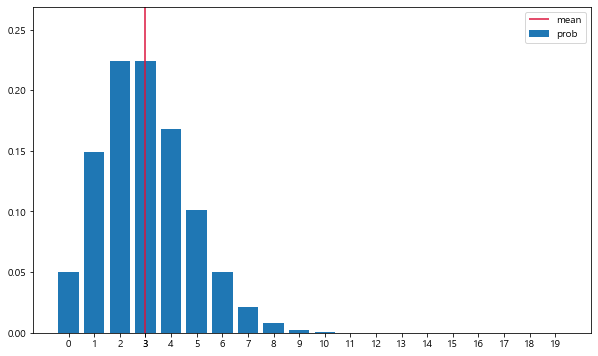

In [309]:
plot_prob(x)

In [310]:
# 사례2
lam = 2
x = Poi(lam)

In [311]:
check_prob(x)

expected value 2.0
variance2.0


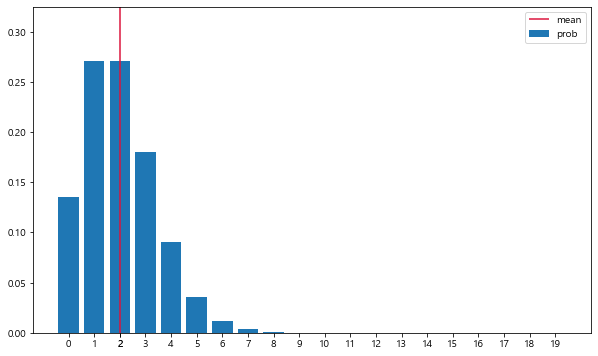

In [312]:
plot_prob(x)

2022년 1월 27일

연속형 확률변수
 - 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.  
 - 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현한다.

연속형 확률분포와 확률밀도함수
 - 특정값이 될 확률은  0, 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 크기)
 - 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포. 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적등의 데이터에 잘 나타나는 분포
  - 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률. Cumulative density function
     * stats.norm.cdf(loc=4, scale=0.8, x=3)
  - 정규분포의 확률밀도 계산
     * 확률변수 3일때의 확률밀도 N(3|4, 0.8**2)
     * stats.norm.pdf(loc=4, scale=0.8, x=3) Probability density function
  - 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다.'에서 N을 고정하고 M을 구하는 경우 
     * 이때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우 이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는  퍼센트 포인트
  - stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨. probability density function 
  - stats.norm.rvs() 함수는 정규확률분포로 부터 난수 생성

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '확률밀도함수')

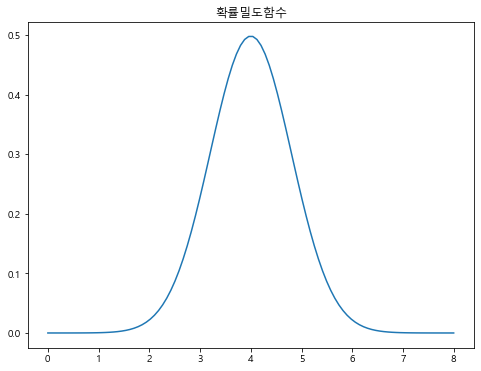

In [314]:
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
rv = stats.norm(loc=4,scale=0.8)
xx = np.linspace(0,8,100)
pdf =rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')

# 확률밀도함수는 면적으로 확률의 값을 계산한다

Text(0.5, 1.0, '누적분포함수')

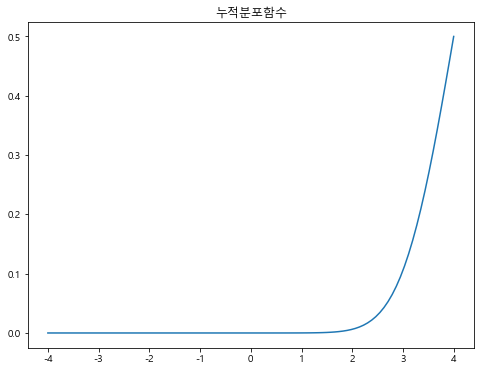

In [315]:
xx = np.linspace(-4,4,100)
cdf = rv.cdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,cdf)
plt.title('누적분포함수')


In [316]:
x_range = np.array([0,1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]

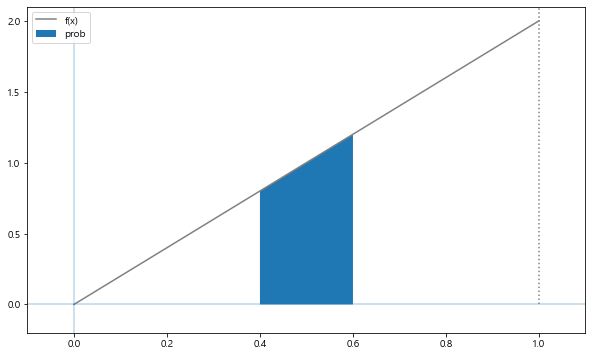

In [317]:
xs = np.linspace(x_range[0],x_range[1],100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color = 'gray')
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0,-0.2,2.2,alpha=0.3)
ax.vlines(xs.max(),0,2.2,linestyles=':',color='gray')
# 0.4 ~ 0.6 x좌표를 setting
xs = np.linspace(0.4,0.6,100)
ax.fill_between(xs,[f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2,1.3,0.2))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()

In [318]:
# 첫번째 인수는 피적분함수, 두번째 인수와 세번째 인수는 적분 범위
# quad 함수는 적분값과 추정오차를 반환
integrate.quad(f, 0.4, 0.6)

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률변수에서는 확률의 성질이 수식을 만족해야 함
 - f(x)가 항상 0 이상의 값을 취함
 - f(x)에 대하여 무한대 범위의 적분 결과는 1

In [319]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수

0

In [320]:
integrate.quad(f, -np.inf,np.inf)[0]

1.0

In [321]:
np.pi

3.141592653589793

In [322]:
#정리
# 정규분포의 확률밀도 계산
# 확률변수 3일때의 확률밀도 N(3/4.0,0.8**2)
x = 3
mu = 4
sigma = 0.8  #(표준편차)

1/ (np.sqrt(2 * np.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))
# 정규분포는 특정값으로 나오는것이 아니라 면적으로 계산하는 것이 원칙

0.22831135673627742

In [323]:
stats.norm.pdf(loc=4,scale=0.8,x=3)

0.2283113567362774

In [324]:
# Q. 표준정규분포에서 확률변수가 1일때의 확률밀도를 구하세요

In [325]:
stats.norm.pdf(loc=0,scale=1,x=1)

0.24197072451914337

In [326]:
# 정규분포 인스턴스 생성
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [327]:
# Q. 다음 x_plot을 정규분포로 만드시오
x_plot = np.arange(1,7.1,0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

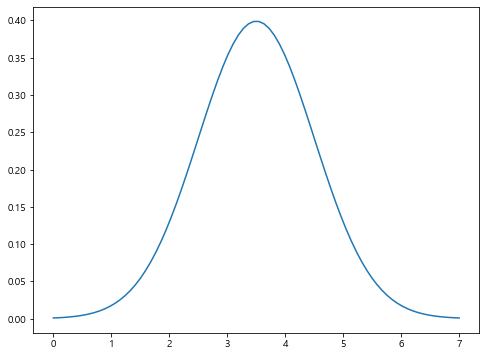

In [328]:
from matplotlib import rc


rv = stats.norm(loc=3.5,scale=1)
xx = np.linspace(0,7,80)
pdf =rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)


In [329]:
# 표본이 어떤 값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8,size=100000)
simulated_sample[:10]

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [330]:
# 요약통계표
import pandas as pd
pd.Series(simulated_sample).describe()


count    100000.000000
mean          4.004202
std           0.798667
min           0.538490
25%           3.465533
50%           4.004800
75%           4.539819
max           7.334494
dtype: float64

In [331]:
# Q. 3보다 작은 샘플의 합계?
a= pd.Series(simulated_sample)
a[a<=3].sum()
#len(a[a<=3])

27151.549504137874

In [332]:
len(simulated_sample)

100000

In [333]:
# Q. 3보다 작은 샘플의 확률은?
len(a[a<=3])/len(simulated_sample)

0.10371

In [334]:
# 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률(loc=4, scale=0.8)


In [335]:
# 누적분포함수
rv = stats.norm.cdf(loc=4, scale=0.8, x=3)
rv

0.10564977366685535

In [336]:
# 정규분포는 평균에 대해 좌우대칭
# 데이터가 평균값 이하가 될 확률은? 50%
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

In [337]:
# 하측확률 : '확률변수 X가 N보다 작을 확률은 M퍼센트이다.' 에서 M을 고정하고 N을 구하는 경우
# q는 하측확률이며, 하측확률을 주어졌을때 퍼센트포인트 구하기.
stats.norm.ppf(loc=4, scale=0.8, q=0.025) 

2.4320288123679563

In [338]:
# 퍼센트 포인트가 주어질때 하측확률을 구하기
stats.norm.cdf(loc=4, scale=0.8, x=2.4320288123679563)

0.024999999999999977

In [339]:
# 하측확률이 50%가 되는 퍼센트 포인트는 평균과 일치
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [340]:
# [과제] 평균 100, 표준편차 10인 정규분포에서 하측확률이 0.3일 경우의 퍼센트포인트를 구하고
#그 pp(퍼센트포인트)를 적용하여 하측확률을 구하세요

In [341]:
stats.norm.ppf(loc=100, scale=10,q=0.3)

94.75599487291959

In [342]:
stats.norm.cdf(loc=100, scale=10, x=94.75599487291959)

0.2999999999999998

In [343]:
# [과제] 상기 정규분포의 확률밀도함수와 누적분포함수를 시각화하여 하측확률과 pp(퍼센트포인트)간의
#관계를 확인하세요.

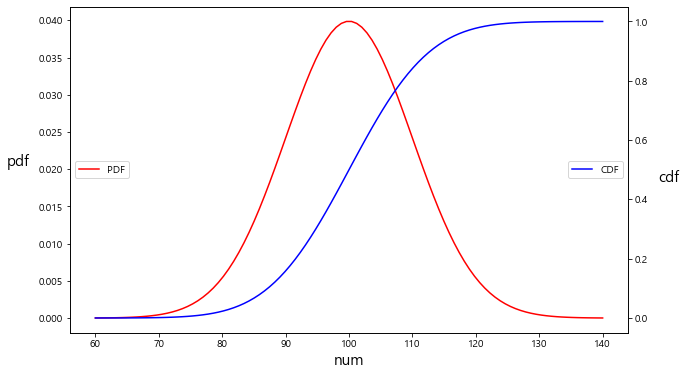

In [344]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

rv = stats.norm(loc=100, scale=10)
xx = np.linspace(60,140,100)

pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

line_pdf = ax1.plot(xx,pdf,color='red',label='PDF')
ax1.set_xlabel('num',fontsize=15)
ax1.set_ylabel('pdf',rotation=0,fontsize=15,labelpad=20)

line_cdf = ax2.plot(xx,cdf,color='blue',label='CDF')
ax2.set_ylabel('cdf',rotation=0,fontsize=15,labelpad=20)

ax1.legend(loc='center left')
ax2.legend(loc='center right')
plt.show()


In [345]:
rv = stats.norm(0,1)

In [346]:
# Q. 확률밀도함수와 누적분포함수를 하나의 그래프로 시각화하여 비교하세요.

누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)1


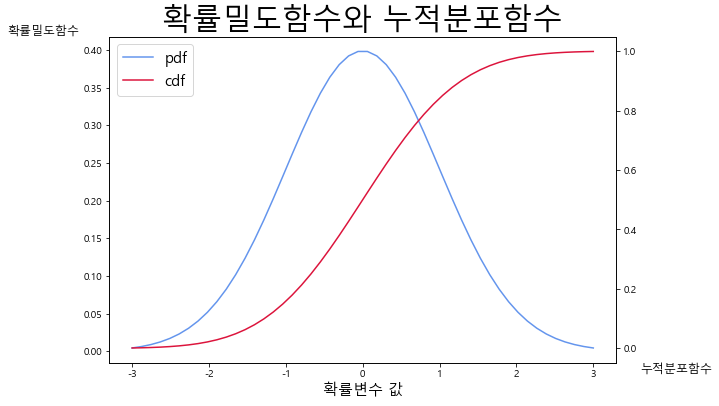

In [347]:
from matplotlib import rc
rc('font',family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분 처리

a = float(input('누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(0,1)
xx = np.linspace(-3,3)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.42,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()


In [348]:
# Q. 0까지 누적분포

In [383]:
rv.cdf(0)

0.0

In [350]:
# Q. 누적분포가 0.5인 X값 

In [351]:
rv.ppf(0.5)


0.0

In [352]:
# Q. 0~1까지의 누적확률분포

In [353]:
rv.cdf(1) - rv.cdf(0)


0.3413447460685429

In [354]:
# Q. (-2< x <2) 확률 

In [355]:
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

In [356]:
# Q. 상위 5% 확률의 퍼센트 포인트

In [357]:
rv.isf(0.05)

1.6448536269514729

In [358]:
# Q. 하위 5% 확률의 퍼센트 포인트

In [359]:
rv.isf(0.05)

1.6448536269514729

In [360]:
rv.ppf(0.95)

1.6448536269514722

In [361]:
# Q. 하위 5% 상위 5% 퍼센트 포인트

In [362]:
rv.interval(0.9)


(-1.6448536269514729, 1.6448536269514722)

 Q. 어느 회사에서 종업원들의 근무시간을 조사하였는데 종업원의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년이상 근무한 종업원의 비율을 구하세요.

In [363]:
rv1 = stats.norm(11,4)
1 - rv1.cdf(14)


0.22662735237686826

Q. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률을 구하세요.

In [364]:
rv2 = stats.norm(800,30)
rv2.cdf(760)

0.09121121972586788

Q. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그러면 점수가 80점 이상이고 90점 이하일 확률을 구하세요


In [365]:
rv3 = stats.norm(70,8)
rv3.cdf(90)-rv3.cdf(80)

0.09944010834107919

대표적인 연속형 확률분포
 - 검정할때 많이 쓰인다.

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

linestyles = ['-','--',':']

def E(X, g=lambda x:x):
    x_range, f=X
    def integrand(x):
        return g(x)*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x:x):
    x_range, f=X
    mean = E(X ,g)
    def integrand(x):
        return (g(x) -mean)**2*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f=X
    f_min = minimize_scalar(f).fun
    assert f_min >=0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0],6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value{E(X):.3f}')
    print(f'variance{V(X):.3f}')
    
def plot_prob(X, x_min, x_max):  # 확률분포와 구간을 인수로 취하고 그 확률변수의 
    x_range, f=X                 # 확률밀도함수와 누적분포를 그리는 함수 
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min,x_max,100)
    
    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
           label = 'f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
           label = 'F(x)', ls='--', color='gray')
    
    ax.legend()
    plt.show()

#### 정규분포
 - 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수 많은 현상을 표현. 가우스 분포라고 부름
 - 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산 두가지이다.

In [367]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/ (np.sqrt(2 * np.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))
    return x_range, f

In [368]:
mu, sigma =2,0.5
X = N(mu, sigma)
check_prob(X)

expected value2.000
variance0.250


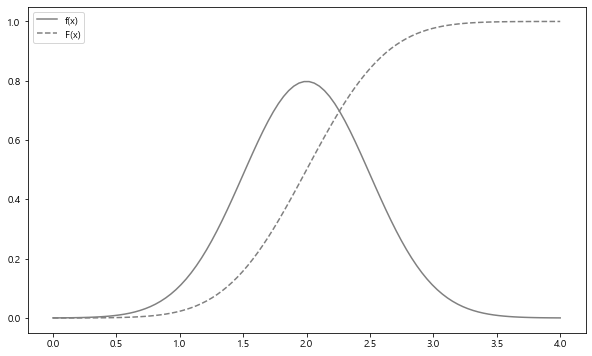

In [369]:
plot_prob(X, 0, 4)

In [370]:
rv = stats.norm(2,0.5)  # 평균2 , 표준편차 0.5
print(rv.mean(),rv.var())

2.0 0.25


In [371]:
#퍼센트포인트(pp)가 2일때 확률밀도
rv.pdf(2)    # 확률밀도함수

0.7978845608028654

In [372]:
# Q. pp가 2일때 하측확률
rv.cdf(x=2)   # 누적분포함수

0.5

In [373]:
# 상위 30% 점
rv.isf(0.3)

2.2622002563540207

In [374]:
# 95% 구간을 구하세요
rv.interval(0.95)

(1.020018007729973, 2.979981992270027)

In [375]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

In [376]:
# [과제] N(mean, sigma**2)파라미터를 각각(0,1), (0,4), (1,1)로 변경할 때의 정규분포를 비교할 수 있도록 시각화 하세요. 

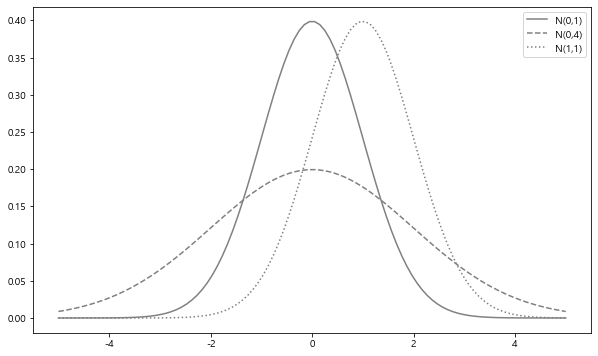

In [377]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
for param, ls in zip(params, linestyles):
    mean, sigma = param
    rv = stats.norm(mean, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mean},{sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

#### 지수분포
 - 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0 이상의 실수
 - 지수분포의 파라미터는 $\lambda$로 양의 실수이며 EX($\lambda$)로 표기한다.
 - EX($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격에 따르는 확률분포이다.

In [378]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >=0:
            return lam*np.exp(-lam*x)    # exp: 지수함수
        else:                             
            return 0
    return x_range, f

In [379]:
lam = 3
X = Ex(lam)
check_prob(X)

expected value0.333
variance0.111


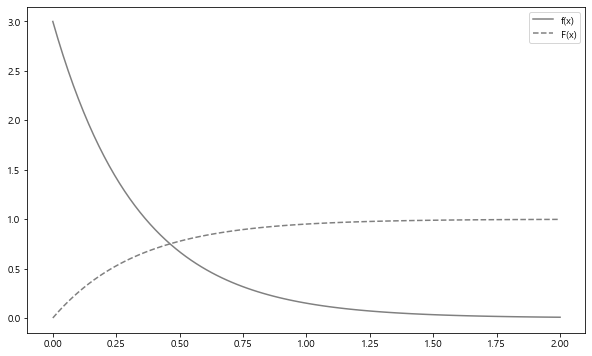

In [380]:
plot_prob(X, 0, 2)

In [381]:
# [과제] 파라미터 람다가 1,2,3 으로 변경시 지수분포의 확률분포함수를 시각화하세요.

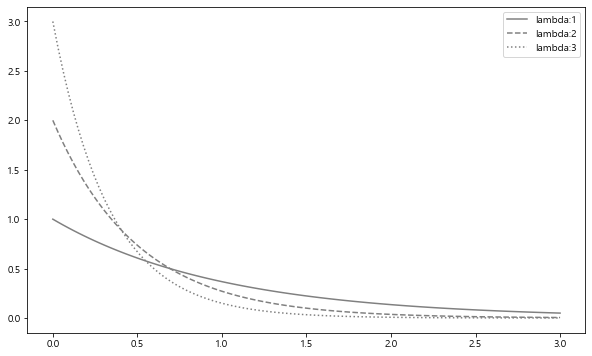

In [382]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
           label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()
plt.show()

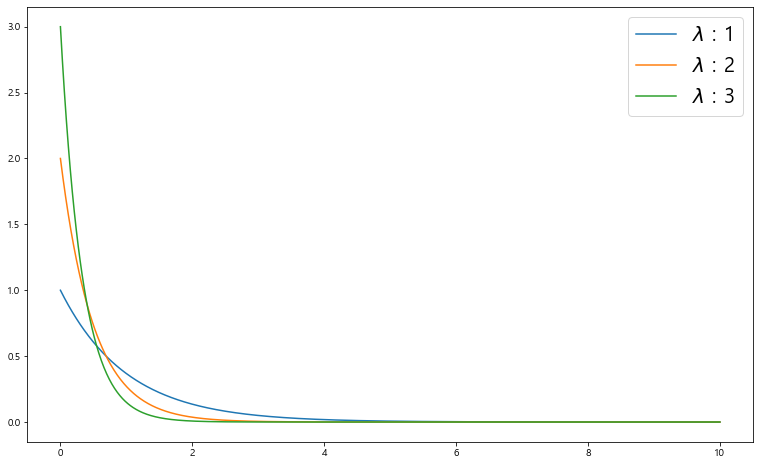

In [385]:
x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(111)

for i in range(1, 4):
    lam = i * np.exp(-i * x)
    ax.plot(x, lam)
    ax.legend(['$\lambda$ : 1', '$\lambda$ : 2', '$\lambda$ : 3'], fontsize = 20)


#### 카이제곱분포
 - Z_1, Z_2, ... Z_n이 서로 독립이고 N(0,1)을 따르고 있을 때, 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라고 한다.
 - 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.
 - 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
 - 자유도가 커지면 좌우대칭에 가까워진다.
 - 자유도의 값 가까이에 분포의 정점이 있다.
 

In [392]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
z_sample = rv.rvs((n, sample_size))
z_sample.shape
chi2_sample = np.sum(z_sample**2,axis=0)

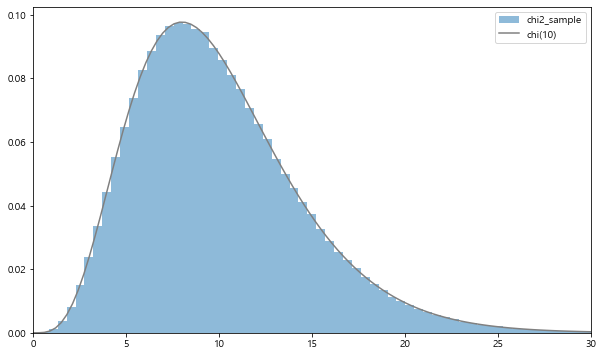

In [396]:
plt.figure(figsize=(10,6))
rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
plt.hist(chi2_sample, bins=100, density=True,
       alpha = 0.5, label='chi2_sample')

plt.plot(xs, rv_true.pdf(xs), label=f'chi({n})', color='gray')
plt.legend()
plt.xlim(0,30)
plt.show()

In [414]:
# 자유도 변화에 따른 카이제곱 분포(p331~332참조): 자유도를 3,5,10으로 변화

https://www.jmp.com/ko_kr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html


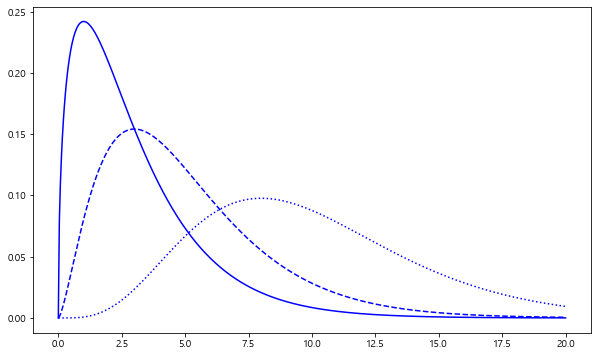

In [398]:
plt.figure(figsize=(10,6))
xs = np.linspace(0, 20,500)
for n,ls in zip([3,5,10],linestyles):
    rv =stats.chi2(n)
    plt.plot(xs, rv.pdf(xs),
           label=f'chi2({n})', ls=ls, color='blue')

ax.legend()
plt.show()

In [400]:
# 자유도 n = 5, 상위 5%의 확률
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

### t분포 ( 표본 샘플이 적어질수록 불확실성이 커지기 때문에  유용함)
 - 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
 - 확률변수 Z,Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 따를 때 t = ${Z}\over{\sqrt{{Y}\over{n}}}$의 확률분포를 자유도가 n인 t분포라고 한다.
 - t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 얘기할 수 있다. 
  * t분포를 만들 때 표본에서 계산한 표분오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어진 표본평균에 관한 불확실성을 짐작할 수 있다.
 - t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검증에 아주 유용하게 쓰이는 분포이다.
  * t분포는 표준정규분포처럼 0을 중심으로 중형의 모습을 가진 대칭분포이다.
  * t분포는 꼬리는 표준정규분포보다 두껍다.(fat tail)
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않을경우 표본분포를 결정할 때 표본의 크기가 30이하이면 t분포를 이용하며, 표본의 크기가 30 이상이면 표준정규분포를 이용한다. 
  

In [401]:
n = 10
rv1 =stats.norm()
rv2 =stats.chi2(n)

sample_size = int(1e6)
z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = z_sample / np.sqrt(chi2_sample/n)

In [ ]:
# 표본데이터의 히스토그램과 밀도함수

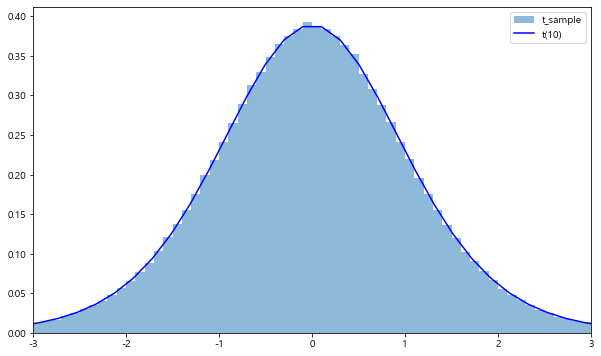

In [409]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-10,10,100)
ax.hist(t_sample, bins=100, range=(-5,5),
       density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})',color='blue')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

In [ ]:
# Q. 자유도 n을 3,5,10,으로 변화 시킬 경우 분포형태를 시각화하여 비교하세요

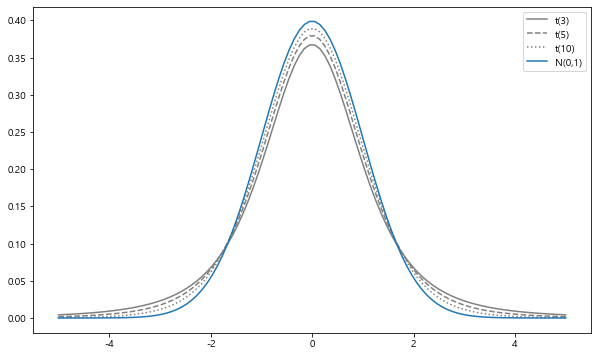

In [410]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
           label = f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0,1)')
ax.legend()
plt.show()

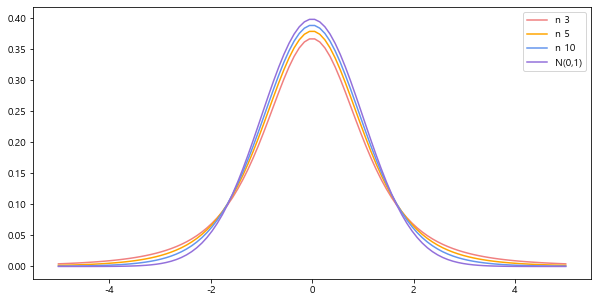

In [411]:
color = ['lightcoral','orange','cornflowerblue']
freedom = [3,5,10]
plt.figure(figsize=(10,5))
xrange = np.linspace(-5,5,100)
for i,color in zip(freedom, color):
    plt.plot(xrange, stats.t(i).pdf(xrange), color=color,
            label = f'n {i}')
plt.plot(xrange,stats.norm().pdf(xrange), color='mediumpurple', label='N(0,1)')
plt.legend()
plt.show()


In [406]:
# Q. 자유도가 5인 t분포의 상위 5%의 확률

In [413]:
rv = stats.t(5)
print(rv.isf(0.05))
print(rv.ppf(0.95))
1 - rv.cdf(2.015048372669157) 

2.0150483726691575
2.015048372669157


0.05000000004235261

#### F분포
 - 확률변수 $Y_1, Y_2는 서로 독립이고 각각 Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때, F = ${Y_1/n_1}\over{Y_2/n_2}$의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
 - 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
 - F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

In [415]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

In [ ]:
# Q. 표본데이터의 히스토그램 밀도함수

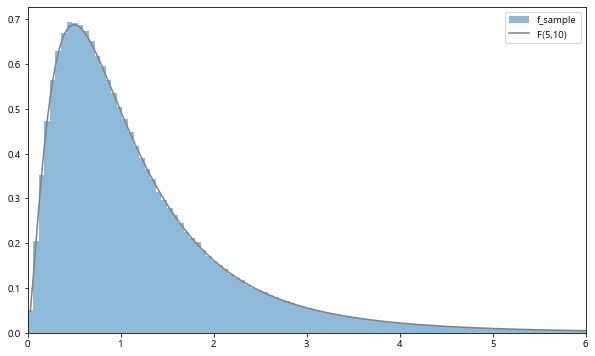

In [416]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)[1:]
ax.hist(f_sample, bins=100, range=(0,6),
       density=True, alpha=0.5, label = 'f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1},{n2})',color = 'gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()

In [ ]:
# Q. n2를 10으로 고정하고 n1을 3,5,10으로 변화시킬 때 분포 형태를 시각화하여 비교하세요.

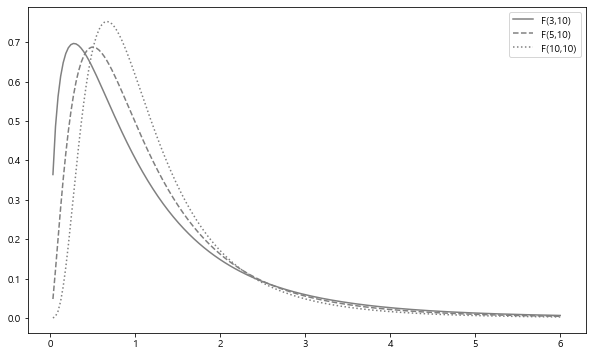

In [417]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs= np.linspace(0,6,200)[1:]
for n1, ls in zip([3,5,10], linestyles):
    rv = stats.f(n1,10)
    ax.plot(xs, rv.pdf(xs),
           label = f'F({n1},10)', ls=ls, color='gray')
ax.legend()
plt.show()

In [ ]:
# n1을 5로 고정하고 n2를 5,10,15로 변화시킬 때 분포 형태를 시각화 하여 비교하세요.

In [422]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,6,200)[1:]
for n2, ls in zip( [5,10,15], linestyle):
    rv = stats.f(5,n2)
    ax.plot(xs,rv.pdf(xs),
           label = f'F(5,{n2})', ls=ls, color=color
ax.legend()
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_712/3709015977.py, line 9)

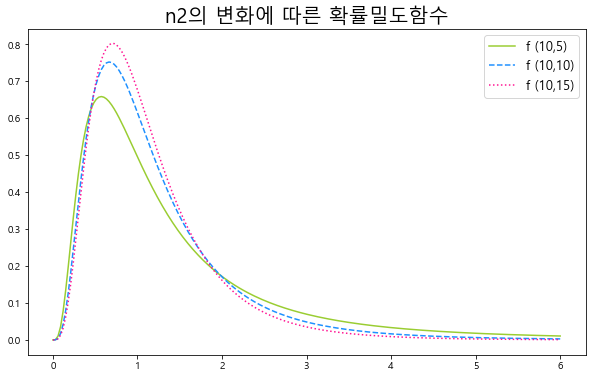

In [423]:
plt.figure(figsize=(10,6))
color = ['yellowgreen','dodgerblue','deeppink']
xs = np.linspace(0,6,200)
for n2,ls,color in zip([5,10,15],linestyles,color):
    rv = stats.f(n1,n2)
    plt.plot(xs,rv.pdf(xs),label=f'f ({n1},{n2})',ls=ls,color=color)
plt.legend(fontsize=13)
plt.title('n2의 변화에 따른 확률밀도함수',fontsize=20)
plt.show()
